In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_pickle("clean_data.pkl")

In [3]:
df

,Age,Education,Gender,Ethnicity,HHIncome,Alcohol,CholHist,HyperHist,ChestPain,Shortness,...,ArmCirc,Waist,HDL,LDL,Tryglicerides,TChol,PHAFSTHR,LBXGLU,Systolic,Diastolic
SEQN,,,,,,,,,,,,,,,,,,,,,
41475.0,62.0,2.0,2.0,5.0,2.0,0.0,0.0,1.0,1.0,1.0,...,45.0,156.0,47.0,NaN,NaN,179.0,7.0,NaN,123.333333,60.666667
41477.0,71.0,2.0,1.0,3.0,2.0,0.0,1.0,1.0,0.0,0.0,...,34.0,110.0,34.0,NaN,NaN,191.0,2.0,NaN,144.666667,52.666667
41479.0,52.0,1.0,1.0,1.0,3.0,0.0,NaN,0.0,0.0,0.0,...,33.0,95.0,47.0,121.0,99.0,188.0,14.0,113.0,108.666667,67.333333
41481.0,21.0,2.0,1.0,4.0,2.0,0.0,NaN,0.0,NaN,NaN,...,31.0,80.0,NaN,NaN,NaN,NaN,12.0,NaN,109.333333,64.000000
41482.0,64.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,0.0,1.0,...,33.0,117.0,43.0,NaN,NaN,158.0,1.0,NaN,116.000000,76.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102949.0,33.0,2.0,1.0,3.0,2.0,NaN,0.0,0.0,NaN,NaN,...,33.0,86.0,73.0,NaN,NaN,201.0,7.0,NaN,122.000000,76.666667
102952.0,70.0,2.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,...,25.0,82.0,60.0,43.0,78.0,119.0,14.0,158.0,139.333333,73.333333
102953.0,42.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,41.0,115.0,49.0,NaN,NaN,182.0,6.0,NaN,120.666667,75.333333


In [4]:
columns =  ['HHIncome', 'Age', 'Education', 'Gender', 'Ethnicity', 'Alcohol',
       'HyperHist', 'CholHist', 'ChestPain', 'Shortness', 'DiabHist',
       'DiabAge', 'Frozen', 'FastFood', 'ReadytoEat', 'MealsOut', 'Milk',
       'UrineLeak', 'KidneyStones', 'WeakKidneys', 'HoursWorked', 'Dental',
       'VigRec', 'ModRec', 'ModWork', 'VigWork', 'WalkBike', 'HoursSlept',
       'SmokeNow', 'Smoke100', 'MaxWeight', 'Pulse', 'ArmCirc', 'BMI', 'Waist',
       'ArmLen', 'LegLen', 'Weight', 'Diastolic','Systolic']

df = df[columns].copy()

# Engineering the Target Variables

### Create the Hypertension target variable

First let us visualise the columns constructing the target variable, the diastolic and systolic blood pressure, colored by the SP past hypertension diagnosis.

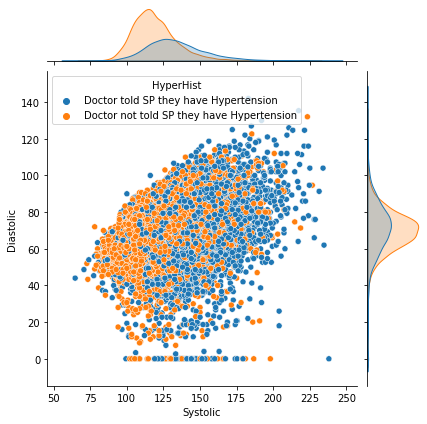

In [5]:
df1 = df.copy()
df1.loc[df1['HyperHist'] == 0,'HyperHist'] = 'Doctor not told SP they have Hypertension'
df1.loc[df1['HyperHist'] == 1,'HyperHist'] = 'Doctor told SP they have Hypertension'
ax = sns.jointplot(data = df1, x = 'Systolic',y = 'Diastolic',hue = 'HyperHist') 


Note the presence of SPs with extreme low Systolic / Diastolic pressure. This can be due to complicating diseases such as artial stiffness, excess adipose tissue, or other complicating factors which inhibits the readings from the prescribed device. 
Consulting the documentation of the Systolic and Diastolic readings we find the rigorous survey methods indicate to record such unlikely results when they do occur.

Viewing the density plot on the sides of the scatterplot show that such very low readings are very rare and can be resonably dropped from our data.

We will remove these very low readings from the data.


Now we define the Hypertension Target variable, based on the guidelines for diagnosing hypertension from blood pressure readings.

  * 0 -- Non-Hypertensive
  * 1 -- Hypertensive

In [6]:

# Let us add a new feature encoding Non-Hypertensive and Hypertensive
 
df.loc[(df.Systolic < 130) & (df.Diastolic < 80),'Hypertensive'] = 0
df.loc[(df.Systolic >= 130) | (df.Diastolic >= 80),'Hypertensive'] = 1
#df.loc[df.HyperHist == 1,'Hypertensive'] = 1  

df.drop(df[ ((df['Systolic'] < 90) | (df['Diastolic'] < 50))].index,inplace = True)




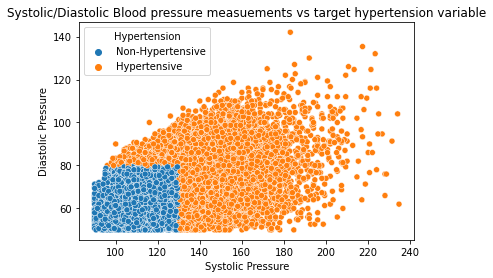

In [7]:
# Let us repeat the above visualization to see the effect:

ax = sns.scatterplot(data = df, x = 'Systolic',y = 'Diastolic',hue = 'Hypertensive')
ax.legend_.set_title('Hypertension') 
ax.set_xlabel('Systolic Pressure')
ax.set_ylabel('Diastolic Pressure')
diag_labels = ['Non-Hypertensive','Hypertensive']
for t, l in zip(ax.legend_.texts, diag_labels): t.set_text(l)
ax.set_title('Systolic/Diastolic Blood pressure measuements vs target hypertension variable')
plt.show()

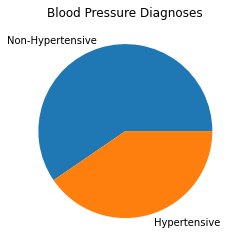

In [8]:
# Visualize the target variable: Diagnosis of Hypertension

diag_totals = df.Hypertensive.value_counts().sort_index().to_numpy()
diag_perc = 100*diag_totals/diag_totals.sum()
fig1, ax1 = plt.subplots()
ax1.pie(diag_perc,labels = diag_labels)
ax1.set_title('Blood Pressure Diagnoses')
plt.show()

### Balancing the Hypertensive target feature

The classes ar slightly imbalanced, with positive cases of hypertension comprising only 40% of the examples of the dataset. There are plenty of examples overall, therefore, we will down sample the negative examples to balance the classes.

In [9]:
from sklearn.utils import resample

# Downsample the positive examples
df_positive = df[df.Hypertensive == 1]
df_negative = df[df.Hypertensive == 0]

samples = min(df_positive.shape[0],df_negative.shape[0])

df_neg_dnsampled = resample(df_negative, replace=False,
                            n_samples=samples)

df_pos_dnsampled = resample(df_positive, replace=False,
                            n_samples=samples)


df = pd.concat([df_neg_dnsampled,df_pos_dnsampled])



### Drop the Systolic and Diastolic measurements

These measurements were used to construct the target variable, using them in the machine learning model would be a source of data leakage.

In [10]:
df.drop(['Systolic','Diastolic'], axis = 1,inplace = True)
line = ('The downsampled dataset has {0} samples with {1} features, '
       'including the target variable.')
print(line.format(*df.shape))

The downsampled dataset has 24642 samples with 39 features, including the target variable.


In [11]:
# Let's view the features of the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 24642 entries, 77126.0 to 102177.0
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HHIncome      22990 non-null  float64
 1   Age           24642 non-null  float64
 2   Education     24642 non-null  float64
 3   Gender        24642 non-null  float64
 4   Ethnicity     24642 non-null  float64
 5   Alcohol       19506 non-null  float64
 6   HyperHist     24606 non-null  float64
 7   CholHist      22114 non-null  float64
 8   ChestPain     17126 non-null  float64
 9   Shortness     17103 non-null  float64
 10  DiabHist      24626 non-null  float64
 11  DiabAge       3351 non-null   float64
 12  Frozen        24602 non-null  float64
 13  FastFood      24615 non-null  float64
 14  ReadytoEat    24579 non-null  float64
 15  MealsOut      24620 non-null  float64
 16  Milk          24548 non-null  float64
 17  UrineLeak     22643 non-null  float64
 18  KidneyStones  2

We can see that features Age, Education, Gender, Ethnicity, along with the target variable Hypertensive are the only columns with no missing data. We will have to impute the remaining values. Before we do this we will split the training and testing data.

## Prepare train and test data

The training data will be used to make decisions about feature engineering and data imputation etc.

In [12]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size = 0.2)

# Exploration and Imputation of the data

First let us view the binary features.

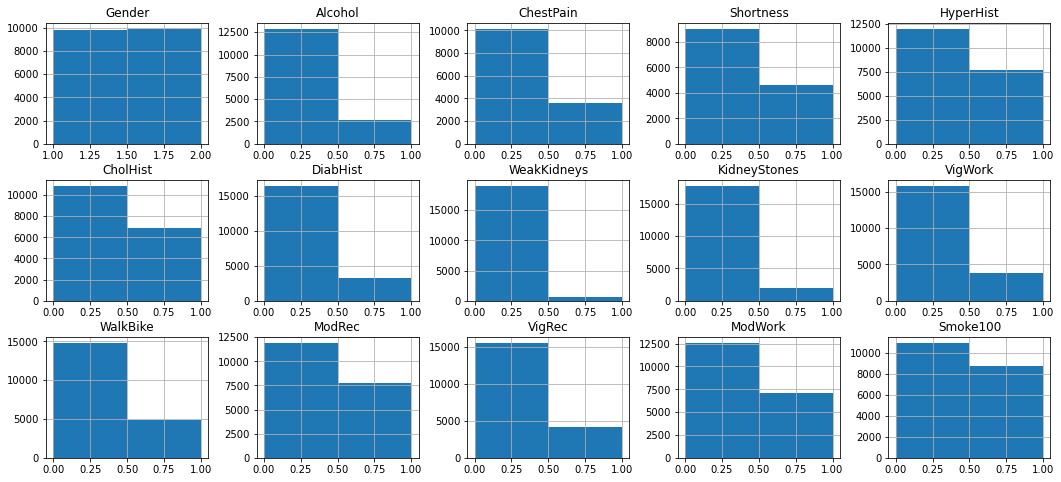

In [13]:
# Binary features
bin_feats = [ 'Gender', 'Alcohol', 'ChestPain', 'Shortness', 'HyperHist',
             'CholHist', 'DiabHist', 'WeakKidneys', 'KidneyStones', 'VigWork',
             'WalkBike', 'ModRec', 'VigRec', 'ModWork', 'Smoke100']

df_bin = df_train[bin_feats]
 

fig, axis = plt.subplots(3,5,figsize=(18, 8))
df_bin.hist(ax=axis,bins = 2)
plt.show()

The variance appears low for the WeakKidneys and KidneyStones features. Let us compare numerical values:

In [14]:
df_train[bin_feats].std(axis = 0)

Gender          0.500005
Alcohol         0.378821
ChestPain       0.439161
Shortness       0.473404
HyperHist       0.487676
CholHist        0.486873
DiabHist        0.369556
WeakKidneys     0.180690
KidneyStones    0.297022
VigWork         0.396887
WalkBike        0.432016
ModRec          0.488956
VigRec          0.407552
ModWork         0.480418
Smoke100        0.496819
dtype: float64

The standard deviation of the KidneyStones variable is somewhat low, but the WeakKidneys standard deviation is quite low. Small variance might make a feature unimformative / hard to utilize while modeling. However, let us see how the proportions of Hypertensives vary with respect to a historical diagnosis of Weak Kidneys.

In [15]:
df_train.groupby('WeakKidneys')['Hypertensive'].mean()

WeakKidneys
0.0    0.493321
1.0    0.625564
Name: Hypertensive, dtype: float64

It appears the difference in proportions is non-trivial, so it seems like a good variable to keep. 

In [16]:
from scipy.stats import chi2_contingency
contingency = pd.crosstab(index=[df_train['WeakKidneys']], columns=df_train['Hypertensive'], margins=True)
p = chi2_contingency(contingency)[1] 

line = 'The chi squared score for WeakKidneys is {:.3e}, indicating a significant predictor.'
print(line.format(p))

The chi squared score for WeakKidneys is 4.077e-09, indicating a significant predictor.


Again, the demographic data is complete, let us see if it is possible (if there is enough data present) to impute missing values from the demographic data.

In [17]:
# The Gender feature is missing no data, so does not require imputation
bin_feats.remove('Gender')

In [18]:
demo = ['Education','Gender']

In [19]:
df_bin = df_train[demo  + ['Ethnicity'] + bin_feats]
print('Proportion of filled values for each demographic: ')
print(df_bin.groupby(by = demo).count().apply(lambda x:min(x)/max(x),axis = 1))
print('Number of total samples for each demographic: ')
print(df_bin.groupby(by = demo).count().max(axis = 1))

Proportion of filled values for each demographic: 
Education  Gender
1.0        1.0       0.740113
           2.0       0.616214
2.0        1.0       0.667572
           2.0       0.691340
3.0        1.0       0.685264
           2.0       0.685101
dtype: float64
Number of total samples for each demographic: 
Education  Gender
1.0        1.0       2301
           2.0       2319
2.0        1.0       5153
           2.0       5404
3.0        1.0       2348
           2.0       2188
dtype: int64


Per each demographic, and binary variable, there are at least 2193 samples with a proportion of 0.619 filled values, it is thus reasonable to use this demographic data to fill the missing binary values.

*(Note: The Ethnicity variable was included in the df_bin data frame, and this column is missing no data which is what allows us to use the above formula.)*

In [20]:
from utils.Imputation import GroupImputer
for col in bin_feats:
    HHIncImputer = GroupImputer(demo,col,metric = 'mode')
    HHIncImputer.fit(df_train)
    df_train = pd.DataFrame(HHIncImputer.transform(df_train),columns = df_train.columns)
    df_test = pd.DataFrame(HHIncImputer.transform(df_test),columns = df_test.columns)

Note the imputation was trained on the df_train set and then applied to both the df_train and df_test sets to prevent data leakage.


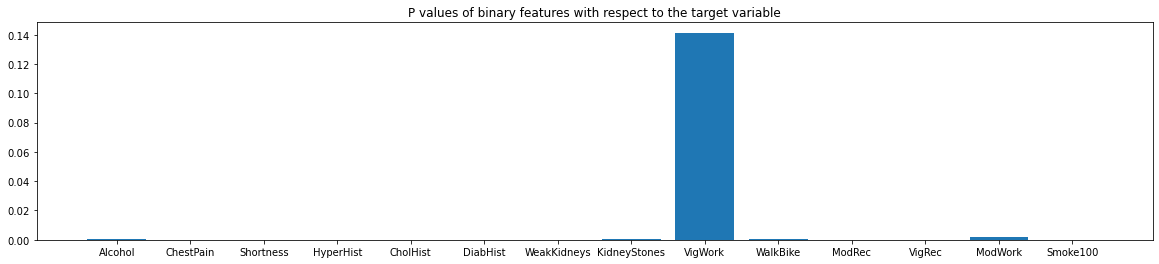

In [21]:
from scipy.stats import chi2_contingency

p_vals = {}
for feat in bin_feats:
    contingency = pd.crosstab(index=[df_train[feat]], columns=df_train['Hypertensive'], margins=True)
    p_vals[feat] = chi2_contingency(contingency)[1] 

plt.figure(figsize = (20,4))
plt.bar(*zip(*p_vals.items()))
#plt.yscale('log')
plt.title('P values of binary features with respect to the target variable')
plt.show()

The VigWork, and ModWork columns are are the least significant variables with respect to the Hypertensive variable, the remaining columns are significantly correlated with with the hypertension target variable.

Let us now consider the ordinal variables: HHIncome, Milk, UrineLeak, Dental, SmokeNow.

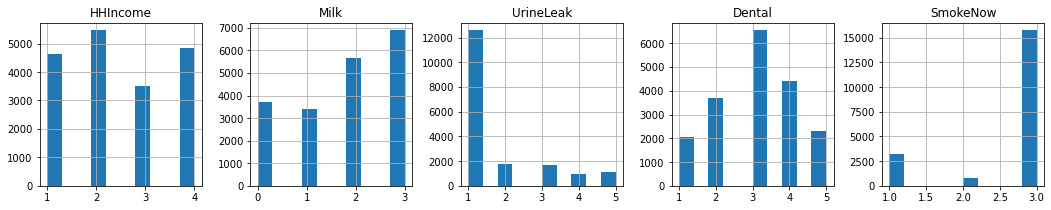

In [22]:
ord_feats = ['HHIncome','Milk','UrineLeak','Dental','SmokeNow']

df_ord = df_train[ord_feats]
 

fig, axis = plt.subplots(1,5,figsize=(18, 3))
df_ord.hist(ax=axis)
plt.show()

SmokeNow, which encodes whether the SP is currently smoking (Everyday/Some days/Not at all) seems to be most concentrated on a single variable. IE having a low entropy value. Let us calculate the entropy of each of these variables.

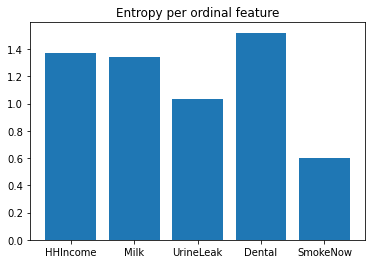

In [23]:
entropy = {}
for feat in ord_feats:
    vc = np.array(df_train[feat].value_counts(normalize=True, sort=False))
    # We use the MLE of entropy with Miller-Madow bias correction
    entropy[feat] = np.sum(-vc*np.log(vc)) + (len(vc) - 1)/df_train[feat].notna().sum()
    
plt.bar(*zip(*entropy.items()))
plt.title('Entropy per ordinal feature')
plt.show()

From this plot we can see all ordinal features have non appreciable entropy and likely make informative features for our model.

In [24]:
df_ord = df_train[demo  + ['Ethnicity'] + ord_feats]
print('Proportion of filled values for each demographic: ')
print(df_ord.groupby(by = demo).count().apply(lambda x:min(x)/max(x),axis = 1))
print('Number of total samples for each demographic: ')
print(df_ord.groupby(by = demo).count().max(axis = 1))

Proportion of filled values for each demographic: 
Education  Gender
1.0        1.0       0.909170
           2.0       0.881414
2.0        1.0       0.934213
           2.0       0.913212
3.0        1.0       0.938245
           2.0       0.911792
dtype: float64
Number of total samples for each demographic: 
Education  Gender
1.0        1.0       2301
           2.0       2319
2.0        1.0       5153
           2.0       5404
3.0        1.0       2348
           2.0       2188
dtype: int64


Again we see that each demographic category provide enough samples to make a simple imputation.

In [25]:
for col in ord_feats:
    OrdImputer = GroupImputer(demo, col, metric = 'mode')
    OrdImputer.fit(df_train)
    df_train = pd.DataFrame(OrdImputer.transform(df_train),columns = df_train.columns)
    df_test = pd.DataFrame(OrdImputer.transform(df_test),columns = df_test.columns)

Next let us turn to dietary data.

Log scaled plots:


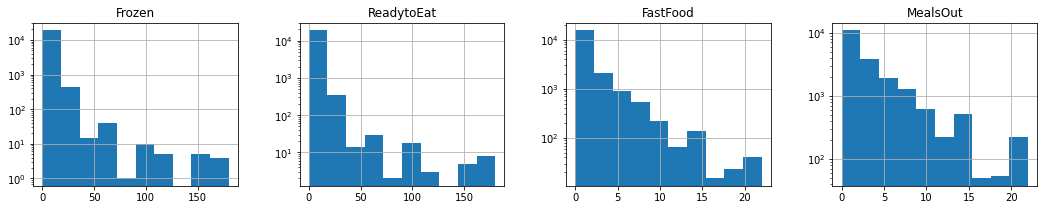

Number of missing values: 


Frozen        33
ReadytoEat    50
FastFood      21
MealsOut      17
dtype: int64

In [26]:
diet = ['Frozen', 'ReadytoEat', 'FastFood', 'MealsOut']

df_diet = df_train[diet]
 

fig, axis = plt.subplots(1,4,figsize=(18, 3))
df_diet.hist(ax=axis)
axis[0].set_yscale('log'); axis[1].set_yscale('log'); axis[2].set_yscale('log'); axis[3].set_yscale('log'); 
print('Log scaled plots:')
plt.show()
print('Number of missing values: ')
df_diet.isna().sum()

All dietary data is fairly skewed and missing few values. Thus imputing the median will not affect the distribution. As we will not be utilizing regression methods, we won't attempt to transform the data to less skewed distributions.

In [27]:
# Imputation by median of the training set.

for feat in diet:
    median = df_train[feat].median() 
    df_train.loc[df_train[feat].isna(), feat] = median
    df_test.loc[df_test[feat].isna(), feat] = median

Lets consider the HoursSlept and HoursWorked variables. The HoursSlept is best viewed as a heat map. The HoursWorked variable does not plot well as a heat map as there are a large portion of SPs working zero hours per week, so we will plot the median per Age.

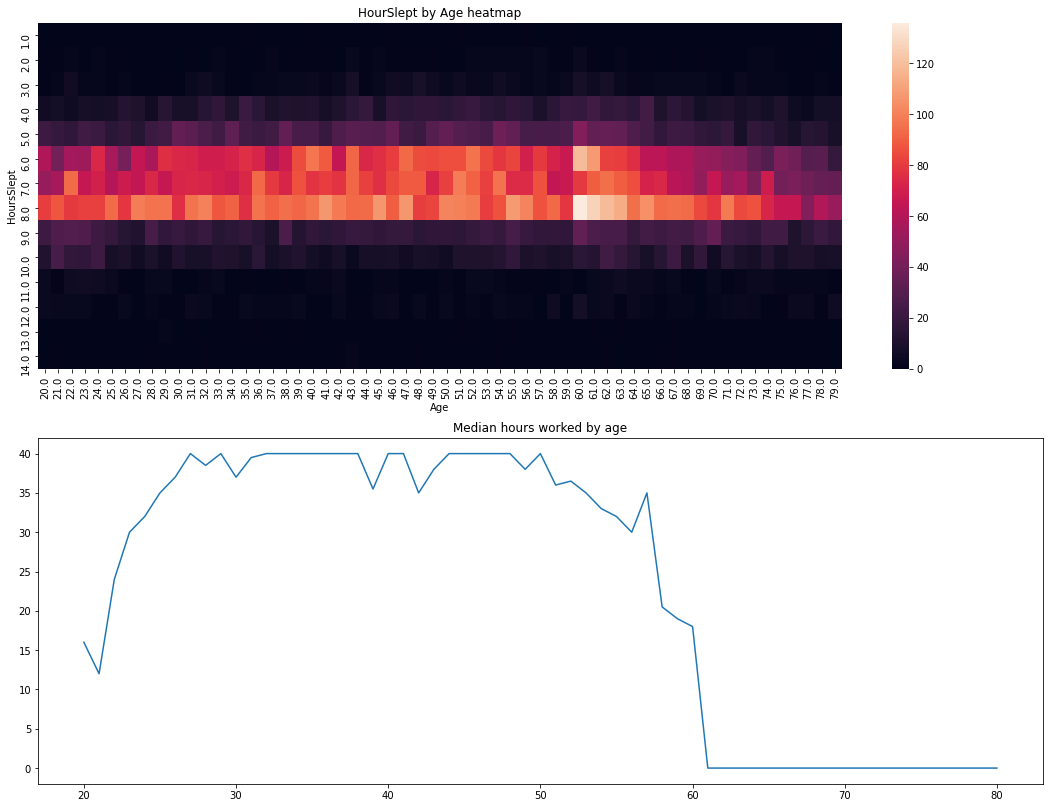

In [28]:
# As there is a large cluster of SPs with Age = 80, we will drop those values to improve the heatmap visualization.
df_train_young = df_train[df_train['Age'] < 80] 
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (18,14))
sns.heatmap(pd.crosstab( df_train_young['HoursSlept'],df_train['Age']),ax = ax1 )
ax1.set_title('HourSlept by Age heatmap')
ax2.plot(df_train[['Age','HoursWorked']].groupby(by = ['Age']).median())
ax2.set_title('Median hours worked by age')
plt.show()

HoursSlept is fairly constant over Age, so we can simply impute the uniform median. However, HoursWorked is clearly Age dependent, so we will attempt to impute the median per Age.

In [29]:
line = 'Each age value contains a minimum of {} values which is sufficient to impute a median.'
m = df_train[['Age','HoursWorked']].groupby(by = ['Age']).count().min()[0]
print(line.format(m))

Each age value contains a minimum of 157 values which is sufficient to impute a median.


In [30]:
median = df_train['HoursSlept'].median() 
df_train.loc[df_train['HoursSlept'].isna(), 'HoursSlept'] = median
df_test.loc[df_test['HoursSlept'].isna(), 'HoursSlept'] = median

WorkImputer = GroupImputer(['Age'], 'HoursWorked', metric = 'median')
WorkImputer.fit(df_train)
df_train = pd.DataFrame(WorkImputer.transform(df_train), columns = df_train.columns)
df_test = pd.DataFrame(WorkImputer.transform(df_test), columns = df_test.columns)

Let us now consider the remaining numerical variables.

First let us consider the Weight and MaxWeight features:

The Weight feature is collected by measurement at time of survey, however the MaxWeight feature is collected by questionaire from the SP. We can see below that this leads to some discrepancy.

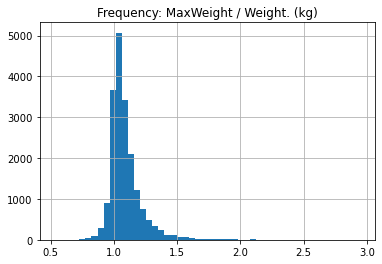

In [31]:
( df_train[ 'MaxWeight'] / df_train[ 'Weight'] ).hist(bins = 50)
plt.title('Frequency: MaxWeight / Weight. (kg)')
plt.show()

Clearly one's current weight cannot be greater than their maximum weight.

We correct the error by setting MaxWeight to Weight whenever Weight > MaxWeight.

In [32]:
df_train.loc[ df_train['Weight'] > df_train['MaxWeight'] ,'MaxWeight'] = df_train['Weight']
df_test.loc[ df_test['Weight'] > df_test['MaxWeight'] ,'MaxWeight'] = df_test['Weight']

Let us add weight ratio as a new feature.

In [33]:
df_train['MaxWeightRatio'] = df_train[ 'MaxWeight'] / df_train[ 'Weight'] 
df_test['MaxWeightRatio'] = df_test[ 'MaxWeight'] / df_test[ 'Weight']    

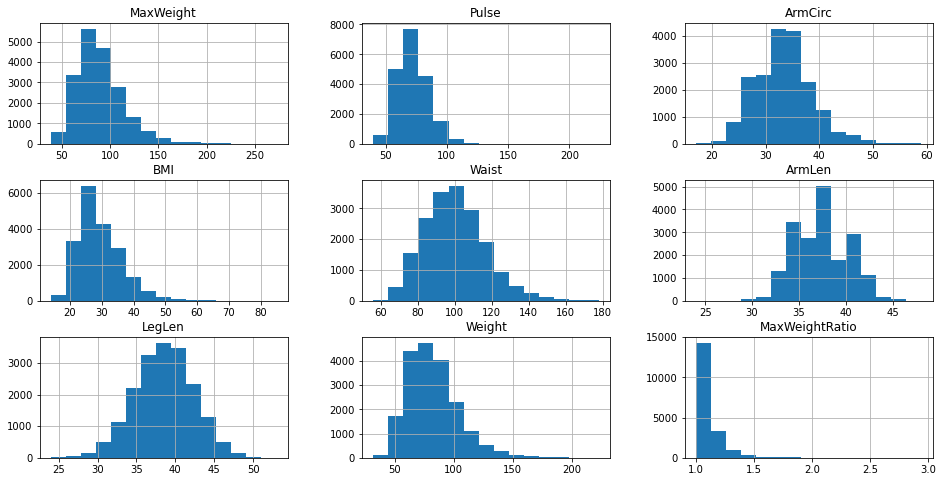

In [34]:
num_feats = ['MaxWeight','Pulse','ArmCirc','BMI','Waist','ArmLen','LegLen','Weight','MaxWeightRatio']

df_num = df_train[num_feats]
 

fig, axis = plt.subplots(3,3,figsize=(16, 8))
df_num.hist(ax=axis, bins = 15)
plt.show()

There is an obvious relation between Weight, MaxWeight, and MaxWeightRatio. Let's see if we can use an age based model to impute missing values.

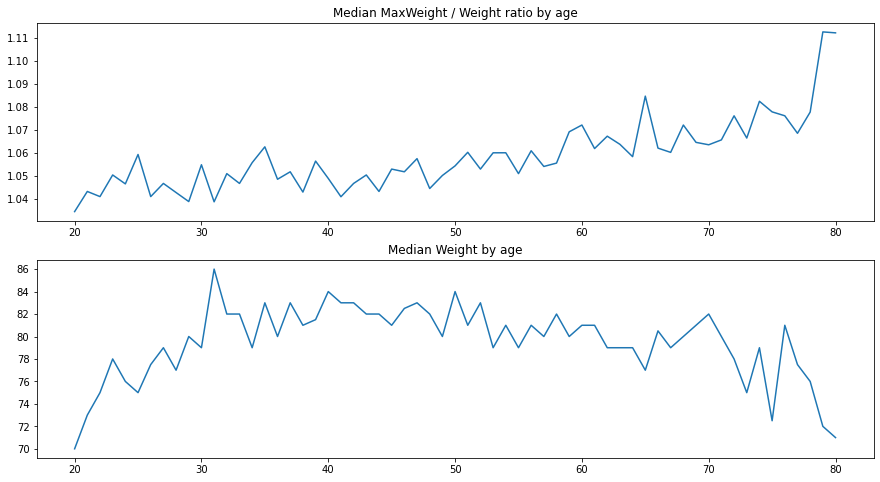

In [35]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (15,8))
ax1.plot(df_train[['Age','MaxWeightRatio']].groupby(by = ['Age']).median())
ax1.set_title('Median MaxWeight / Weight ratio by age')
ax2.plot(df_train[['Age','Weight']].groupby(by = ['Age']).median())
ax2.set_title('Median Weight by age')
plt.show()

As the data appears noisy, we will attempt to smooth it with centered rolling means.

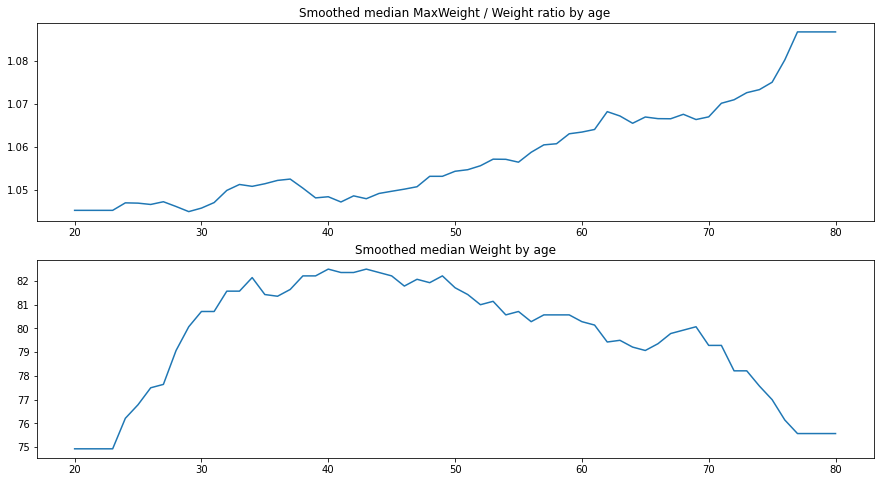

In [36]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (15,8))
df_A2MWR = df_train[['Age','MaxWeightRatio']].groupby(by = ['Age']).median().rolling(window = 7, center = True).mean()
df_A2MWR = df_A2MWR.interpolate(limit_direction = 'both')
ax1.plot(df_A2MWR)
ax1.set_title('Smoothed median MaxWeight / Weight ratio by age')
df_A2W = df_train[['Age','Weight']].groupby(by = ['Age']).median().rolling(window = 7, center = True).mean()
df_A2W = df_A2W.interpolate(limit_direction = 'both')
ax2.plot(df_A2W)
ax2.set_title('Smoothed median Weight by age')
plt.show()

Now let us use the age variable to impute the Weight and MaxWeightRatio columns. We will drop the MaxWeight column.

In [37]:
from utils.Imputation import ContinuousImputer
for col in ['Weight','MaxWeightRatio']:
    colImputer = ContinuousImputer('Age', col, 7)
    colImputer.fit(df_train)
    df_train = pd.DataFrame(colImputer.transform(df_train),columns = df_train.columns)
    df_test = pd.DataFrame(colImputer.transform(df_test),columns = df_test.columns)

df_train.drop(['MaxWeight'], axis = 1,inplace = True)
df_test.drop(['MaxWeight'], axis = 1,inplace = True)

Now let us consider whether the Pulse and Waist columns can be imputed from Age.

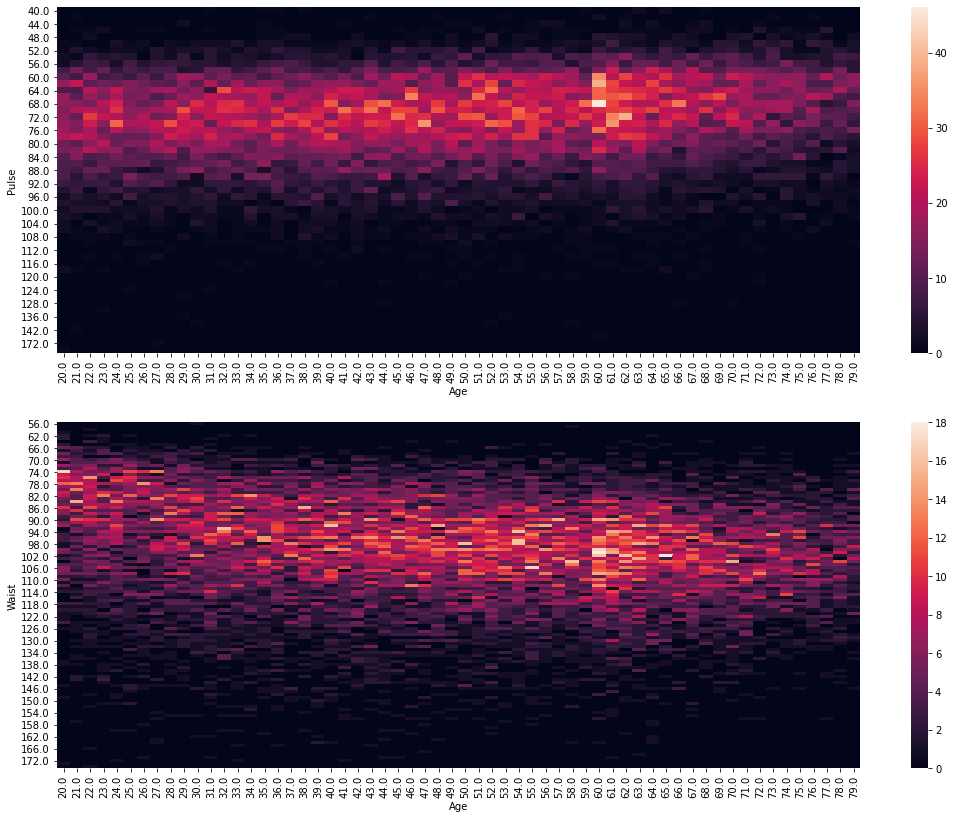

In [38]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (18,14))
sns.heatmap(pd.crosstab( df_train_young['Pulse'],df_train_young['Age']),ax = ax1 )
sns.heatmap(pd.crosstab( df_train_young['Waist'],df_train_young['Age']),ax = ax2 )
plt.show()

The heatmaps again suggest that Age is a decent variable to impute Pulse and Waist. We will apply this imputation next.

In [39]:
for col in ['Pulse','Waist']:
    colImputer = ContinuousImputer('Age', col, 7)
    colImputer.fit(df_train)
    df_train = pd.DataFrame(colImputer.transform(df_train),columns = df_train.columns)
    df_test = pd.DataFrame(colImputer.transform(df_test),columns = df_test.columns)

Let us see if the ArmCirc and BMI can be imputed from the Waist column

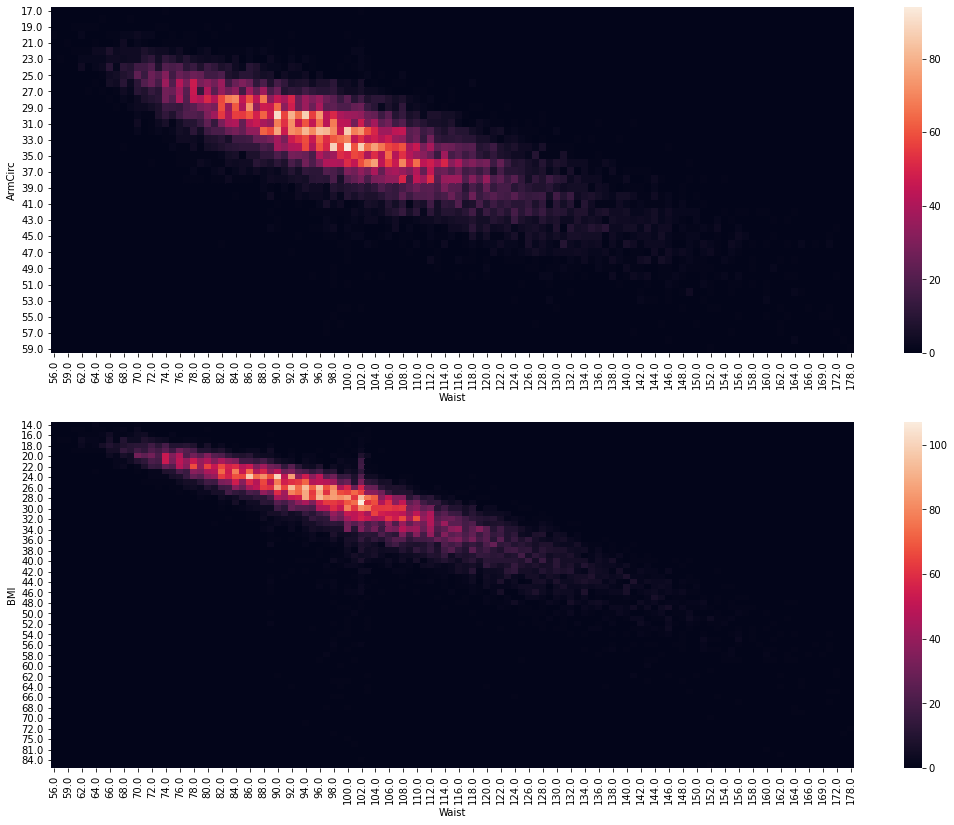

In [40]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (18,14))
sns.heatmap(pd.crosstab( df_train['ArmCirc'],df_train['Waist']),ax = ax1 )
sns.heatmap(pd.crosstab( df_train['BMI'],df_train['Waist']),ax = ax2 )
plt.show()

These appear to have a strong even linear classification, so we will use this grouping for imputation.

In [41]:
for col in ['ArmCirc','BMI']:
    colImputer = ContinuousImputer('Waist', col, 7)
    colImputer.fit(df_train)
    df_train = pd.DataFrame(colImputer.transform(df_train),columns = df_train.columns)
    df_test = pd.DataFrame(colImputer.transform(df_test),columns = df_test.columns)

Finally, for ArmLen and LegLen, we will use the Gender variable to impute.

In [42]:
for col in ['ArmLen','LegLen']:
    colImputer = GroupImputer(['Gender'], col, 'median')
    colImputer.fit(df_train)
    df_train = pd.DataFrame(colImputer.transform(df_train),columns = df_train.columns)
    df_test = pd.DataFrame(colImputer.transform(df_test),columns = df_test.columns)

Finally, we will consider the DiabAge column. Note not all SPs can be given a numeric value for this column, since many were not given a Diabetic diagnosis at any age. Thus we consider whether we can create 2 columns. One for a diabetes diagnosis at an age under the median and a second for a diabetes diagnosis at an age at or above the median.

In [43]:
DiabAgeMedian = df_train['DiabAge'].median()
df_train['DiabAgeYoung'] = (df_train['DiabAge'] < DiabAgeMedian).astype(int)
df_train['DiabAgeOld'] = (df_train['DiabAge'] >= DiabAgeMedian).astype(int)

df_test['DiabAgeYoung'] = (df_test['DiabAge'] < DiabAgeMedian).astype(int)
df_test['DiabAgeOld'] = (df_test['DiabAge'] >= DiabAgeMedian).astype(int)

df_train.drop(['DiabAge'], axis = 1,inplace = True)
df_test.drop(['DiabAge'], axis = 1,inplace = True)

To test these constructed columns, we will conduct a chi squared test (conditioned on having recieved a diabetes diagnosis).

In [44]:
contingency = np.zeros([2,2])
contingency[0,0] = ((df_train['DiabAgeYoung'] == 1) & (df_train['Hypertensive' ] == 1)).sum()
contingency[0,1] = ((df_train['DiabAgeOld'] == 1) & (df_train['Hypertensive' ] == 1)).sum()
contingency[1,0] = ((df_train['DiabAgeYoung'] == 1) & (df_train['Hypertensive' ] == 0)).sum()
contingency[1,1] = ((df_train['DiabAgeOld'] == 1) & (df_train['Hypertensive' ] == 0)).sum()
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contingency) 
print('The p value for the chi shared test becomes {:.3e}, indicating a significant predictor.'.format(p))

The p value for the chi shared test becomes 6.267e-05, indicating a significant predictor.


In [45]:
df_train.isna().sum() + df_test.isna().sum()

HHIncome          0
Age               0
Education         0
Gender            0
Ethnicity         0
Alcohol           0
HyperHist         0
CholHist          0
ChestPain         0
Shortness         0
DiabHist          0
Frozen            0
FastFood          0
ReadytoEat        0
MealsOut          0
Milk              0
UrineLeak         0
KidneyStones      0
WeakKidneys       0
HoursWorked       0
Dental            0
VigRec            0
ModRec            0
ModWork           0
VigWork           0
WalkBike          0
HoursSlept        0
SmokeNow          0
Smoke100          0
Pulse             0
ArmCirc           0
BMI               0
Waist             0
ArmLen            0
LegLen            0
Weight            0
Hypertensive      0
MaxWeightRatio    0
DiabAgeYoung      0
DiabAgeOld        0
dtype: int64

In [46]:
df_train.to_pickle("HT_train.pkl")
df_test.to_pickle("HT_test.pkl")